In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cooltools
import cooler

/home1/yxiao977/.conda/envs/akita/lib/python3.9/site-packages/cooltools/lib/numutils.py:652: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_correction_symmetric(
/home1/yxiao977/.conda/envs/akita/lib/python3.9/site-packages/cooltools/lib/numutils.py:727: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_correction_asymmetric(x, max_iter=10

In [8]:
# clr = cooler.Cooler('/home1/yxiao977/labwork/train_akita/data/5000res_0.5thres_hic.cool')

### to print chromosomes and binsize for this cooler
print(f'chromosomes: {clr.chromnames}, binsize: {clr.binsize}')

### to make a list of chromosome start/ends in bins:
total_length = 0
chromstarts = []
chromsizes = []
for i in clr.chromnames:
    print(f'{i} : {clr.extent(i)}')
    chromstarts.append(clr.extent(i)[0])
    chro_extent_len = clr.extent(i)[1] - clr.extent(i)[0]
    total_length += chro_extent_len * clr.binsize
    chromsizes.append((i, chro_extent_len * clr.binsize))
print(f'total genome length: {total_length}')

chromosomes: ['chr1_pilon', 'chr2_pilon', 'chr3_pilon', 'chr4_pilon', 'chr5_pilon', 'chr6_pilon', 'chr7_pilon', 'chr8_pilon', 'chr9_pilon', 'chr10_pilon', 'chr11_pilon', 'chr12_pilon', 'chr13_pilon', 'chr14_pilon', 'chr15_pilon', 'chr16_pilon', 'chr17_pilon', 'chr18_pilon', 'chr19_pilon', 'chr20_pilon', 'chr21_pilon', 'chr22_pilon', 'chr23_pilon', 'chr24_pilon', 'chr25_pilon', 'chr26_pilon', 'chr27_pilon', 'chr28_pilon', 'chr29_pilon', 'chr30_pilon', 'chr31_pilon', 'chr32_pilon', 'chr33_pilon', 'chr34_pilon', 'chr35_pilon', 'chr36_pilon', 'chr37_pilon', 'chr38_pilon', 'chr39_pilon', 'chr40_pilon', 'chr41_pilon', 'chr42_pilon', 'chr43_pilon', 'chr44_pilon', 'chr45_pilon', 'chr46_pilon', 'chr47_pilon', 'chr48_pilon', 'chr49_pilon', 'chr50_pilon', 'chr51_pilon', 'chr52_pilon', 'chr53_pilon', 'chr54_pilon', 'chr55_pilon', 'chr56_pilon', 'chr57_pilon', 'chr58_pilon', 'chr59_pilon', 'chr60_pilon', 'chr61_pilon', 'chr62_pilon', 'chr63_pilon', 'chr64_pilon', 'chr65_pilon', 'chr66_pilon', 'chr6

In [12]:
clr.matrix(balance=True).fetch('chr85_pilon:130000-380000')

array([[0.        , 0.        ,        nan, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        ,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.        , 0.        ,        nan, ..., 0.43044577, 0.04219391,
        0.        ],
       [0.        , 0.        ,        nan, ..., 0.04219391, 0.34170167,
        0.        ],
       [0.        , 0.        ,        nan, ..., 0.        , 0.        ,
        0.        ]])

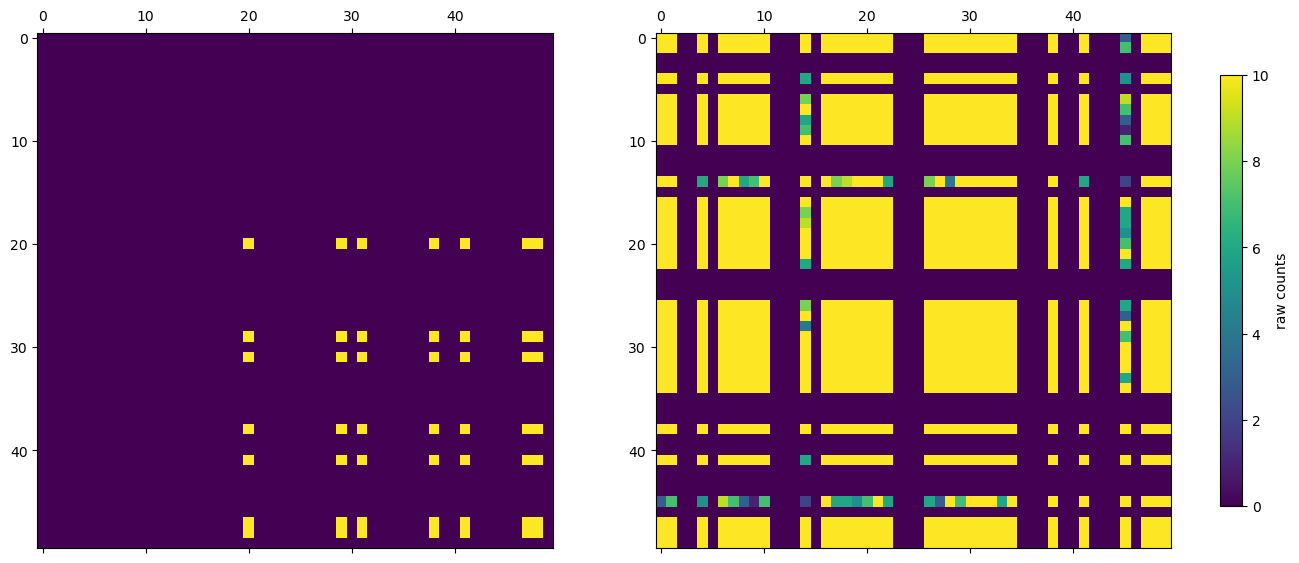

In [15]:
clr = cooler.Cooler('/home1/yxiao977/sc1/test_func/test_cool_0.5thres.cool')

f, axs = plt.subplots(1, 2)
im = axs[0].matshow((clr.matrix(balance=False).fetch('chr85_pilon:130000-380000')), vmax=10, vmin=0)
# axs[0].set(xticks=chromstarts[:2], xticklabels=clr.chromnames[:2],
#        xlabel='position, chrom#', ylabel='position, bin#')
axs[0].xaxis.set_label_position('top')

clr2 = cooler.Cooler('/home1/yxiao977/sc1/test_func/test.cool')
im = axs[1].matshow((clr2.matrix(balance=False).fetch('chr85_pilon:130000-380000')), vmax=10, vmin=0)
# axs[1].set(xticks=chromstarts[:2], xticklabels=clr2.chromnames[:2],
#        xlabel='position, chrom#', ylabel='position, bin#')
axs[1].xaxis.set_label_position('top')

f.colorbar(im, fraction=0.046, pad=0.04, label='raw counts', ax=axs, shrink=0.7)
f.set_size_inches(16, 8)

# Visualize training slices

In [4]:
from basenji import dataset
import json
import matplotlib.colors as mcolors

### names of targets ###
data_dir =   '/home1/yxiao977/sc1/train_akita/data/4m_filtered/'

hic_targets = pd.read_csv(data_dir+'/targets.txt',sep='\t')
hic_file_dict_num = dict(zip(hic_targets['index'].values, hic_targets['file'].values) )
hic_file_dict     = dict(zip(hic_targets['identifier'].values, hic_targets['file'].values) )
hic_num_to_name_dict = dict(zip(hic_targets['index'].values, hic_targets['identifier'].values) )

# read data parameters
data_stats_file = '%s/statistics.json' % data_dir
with open(data_stats_file) as data_stats_open:
    data_stats = json.load(data_stats_open)
seq_length = data_stats['seq_length']
target_length = data_stats['target_length']
hic_diags =  data_stats['diagonal_offset']
target_crop = data_stats['crop_bp'] // data_stats['pool_width']
target_length1 = data_stats['seq_length'] // data_stats['pool_width']

sequences = pd.read_csv(data_dir+'sequences.bed', sep='\t', names=['chr','start','stop','type'])
sequences_train = sequences.iloc[sequences['type'].values=='train']
sequences_train.reset_index(inplace=True, drop=True)
train_data = dataset.SeqDataset(data_dir, 'train', batch_size=8)
train_inputs, train_targets = train_data.numpy()

In [5]:
data_dir = '/home1/yxiao977/sc1/train_akita/data/4m_unfiltered/'

sequences2 = pd.read_csv(data_dir+'sequences.bed', sep='\t', names=['chr','start','stop','type'])
sequences_train2 = sequences2.iloc[sequences2['type'].values=='train']
sequences_train2.reset_index(inplace=True, drop=True)
train_data2 = dataset.SeqDataset(data_dir, 'train', batch_size=8)
train_inputs2, train_targets2 = train_data2.numpy()


In [6]:
def from_upper_triu(vector_repr, matrix_len, num_diags):
    z = np.zeros((matrix_len,matrix_len))
    triu_tup = np.triu_indices(matrix_len,num_diags)
    z[triu_tup] = vector_repr
    for i in range(-num_diags+1,num_diags):
        set_diag(z, np.nan, i)
    return z + z.T

In [22]:
import sys
sys.path.append('/home1/yxiao977/labwork/Akita_dinoflagellate/')
import data_util

clr = cooler.Cooler('/home1/yxiao977/sc1/test_func/test.cool')
cis_total_filter = data_util.cis_total_ratio_filter(0.5)
bin_mask = data_util.generate_bin_mask(clr, [cis_total_filter])
bad_bins = clr.bins()[:].loc[~bin_mask * (clr.bins()[:]['weight'] > 0)]


/home1/yxiao977/labwork/Akita_dinoflagellate/data_util.py:66: RuntimeWarning: invalid value encountered in true_divide
  cis_total_cov = coverage[0] / coverage[1]


In [32]:
train_indices =  []
for i, row in bad_bins.iterrows():
    train_indices.append(np.where((sequences2['chr'].values == row['chrom']) *
                            (sequences2['start'].values <= row['start'])*
                            (sequences2['stop'].values >=  row['end']))[0])
train_indices = np.unique(train_indices)
train_indices = [v[0] for v in train_indices[1:]]

/home1/yxiao977/.conda/envs/akita/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


 
chr87_pilon:760000-1010000


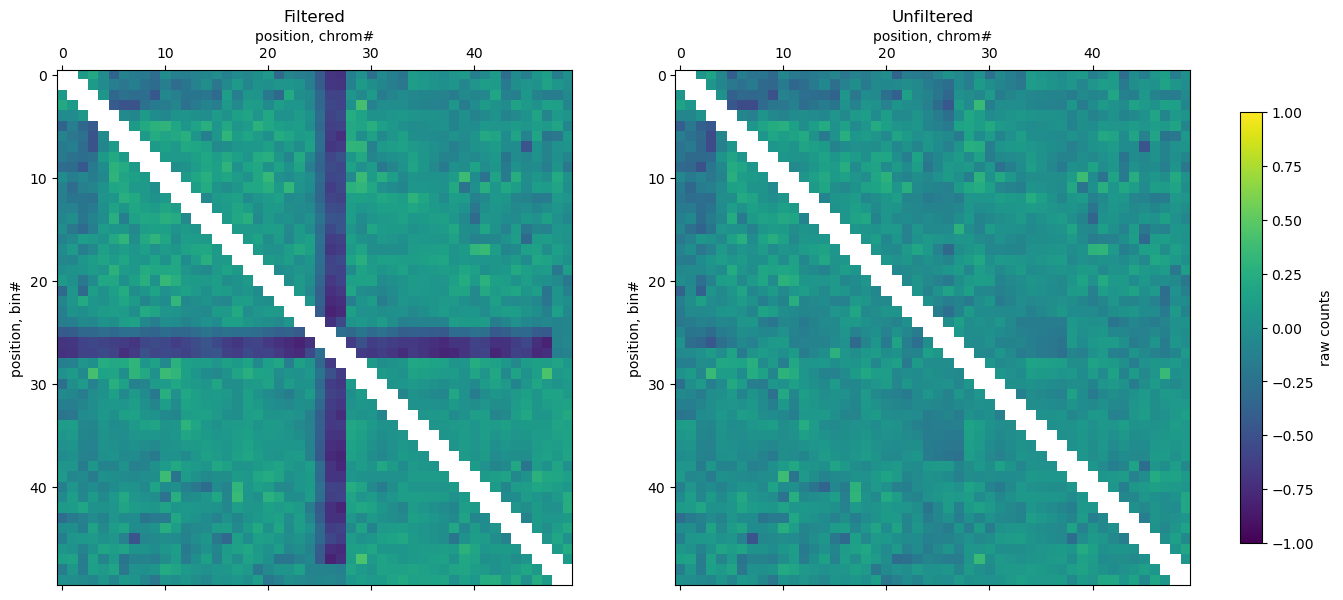

 
chr87_pilon:510000-760000


<Figure size 640x480 with 0 Axes>

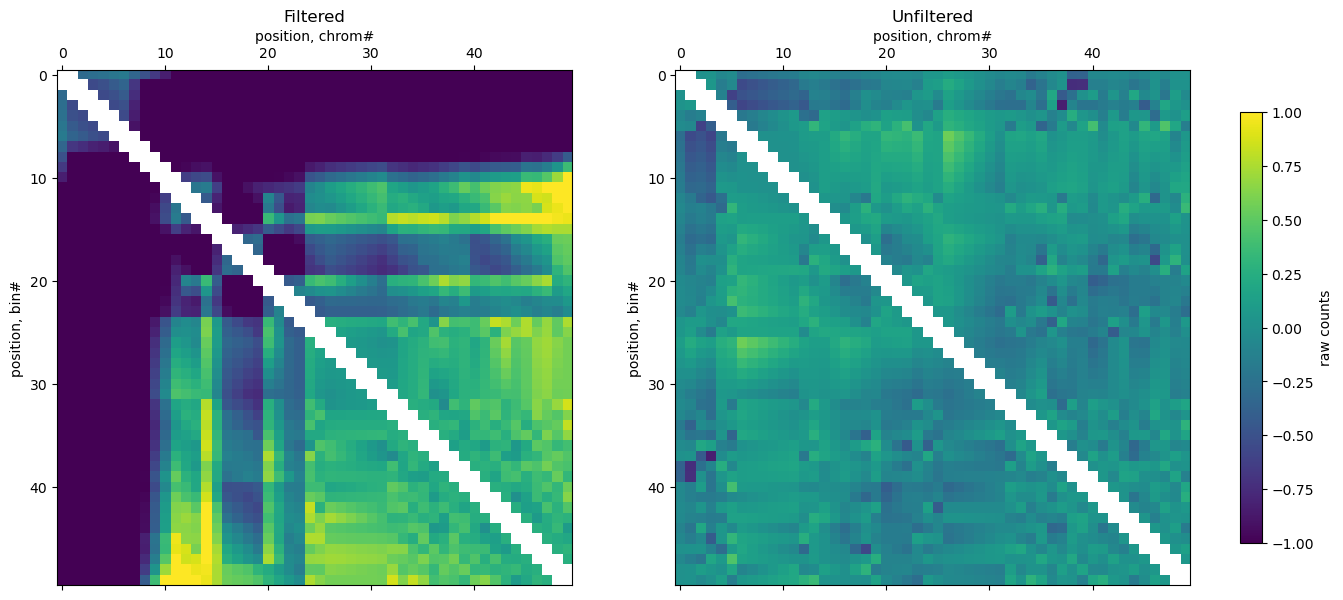

 
chr85_pilon:130000-380000


<Figure size 640x480 with 0 Axes>

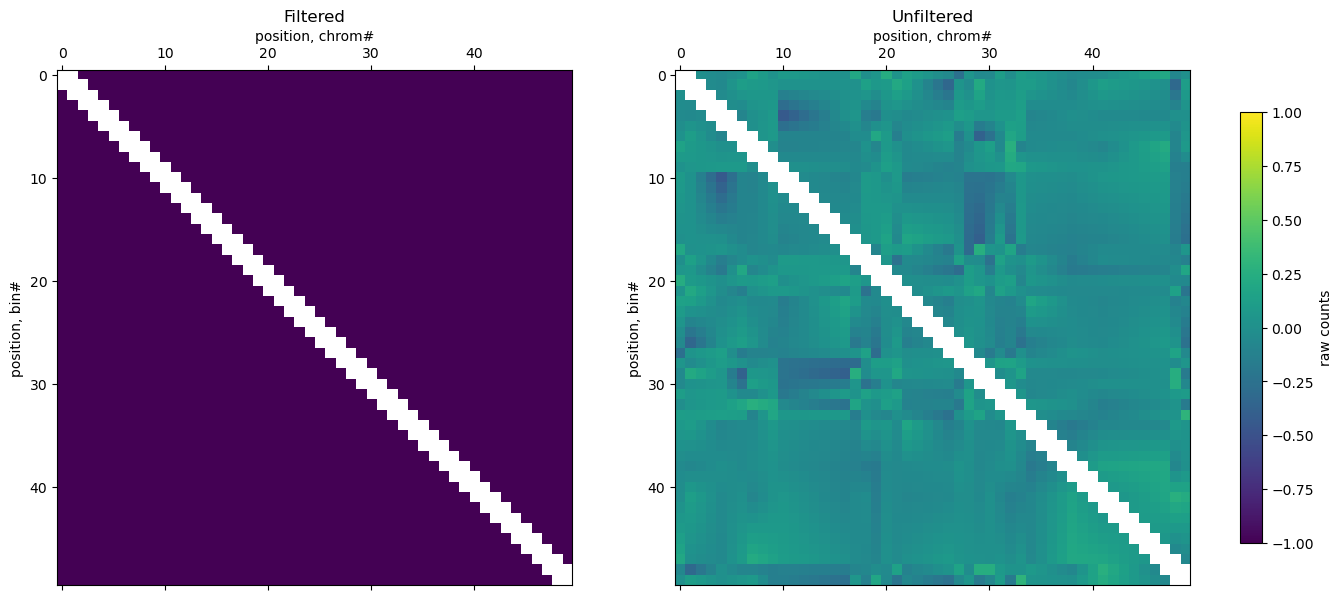

 
chr63_pilon:1150000-1400000


<Figure size 640x480 with 0 Axes>

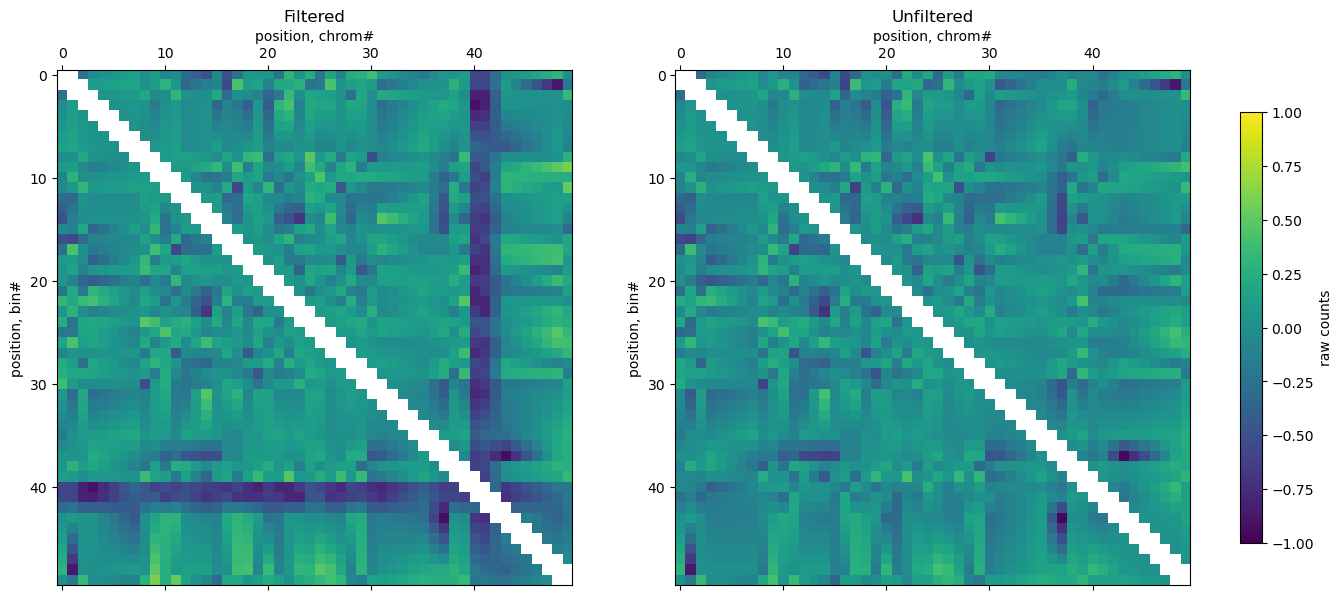

 
chr63_pilon:900000-1150000


<Figure size 640x480 with 0 Axes>

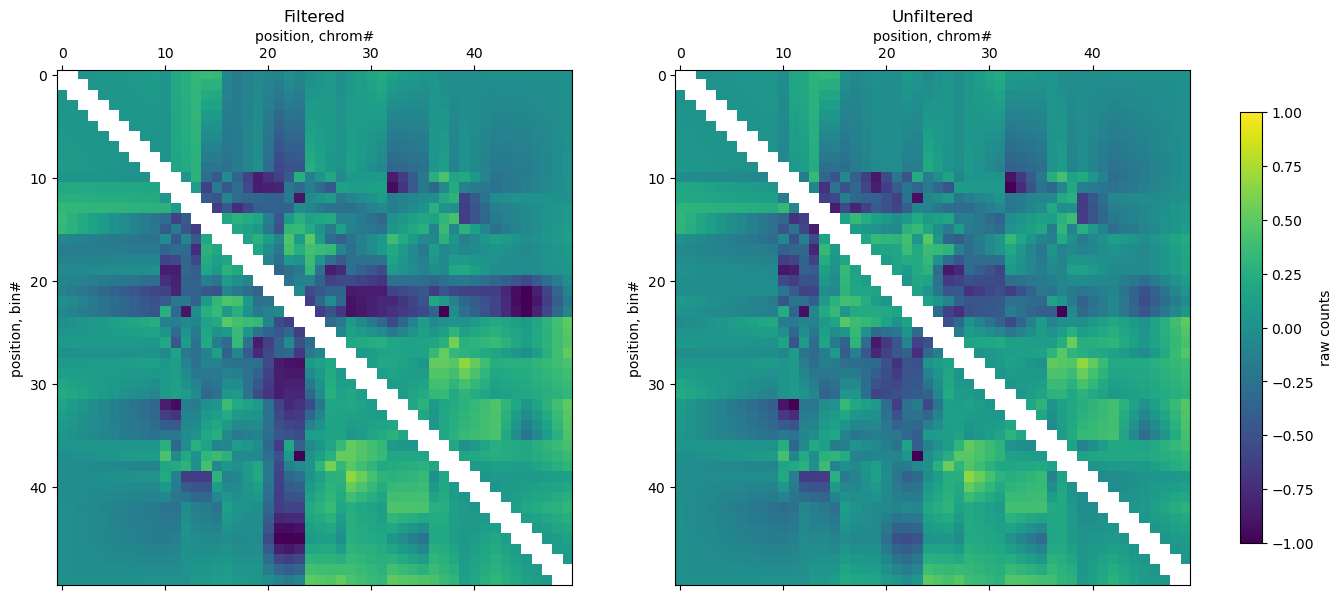

 
chr63_pilon:250000-500000


<Figure size 640x480 with 0 Axes>

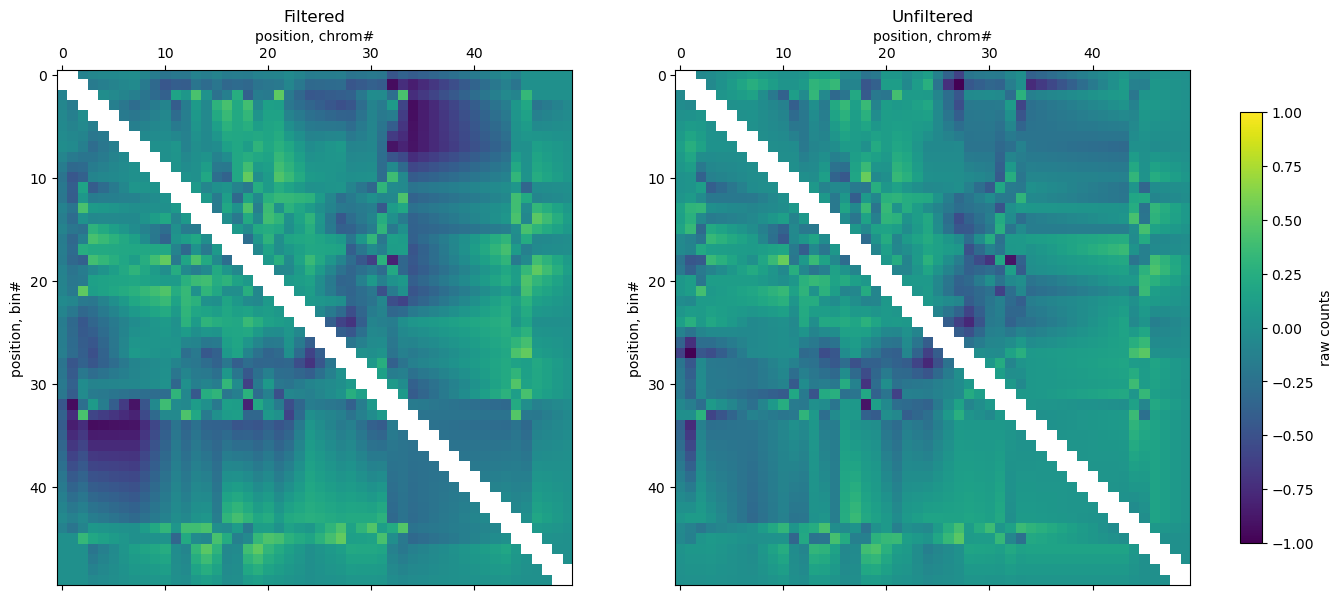

<Figure size 640x480 with 0 Axes>

In [34]:
from cooltools.lib.numutils import set_diag
# Visualize train slices 

# train_indices = np.random.randint(low=0, high=len(sequences_train.index) - 1, size=100)

target_index = 0 # HFF 

for train_index in train_indices:

    chrm, seq_start, seq_end = sequences_train.iloc[train_index][0:3]
    myseq_str = chrm+':'+str(seq_start)+'-'+str(seq_end)
    print(' ')
    print(myseq_str)

    train_target = train_targets[train_index:train_index+1,:,:]

    target_index = 0
    target_length1_cropped = 50
    hic_diag = 2
    vmin=-1
    vmax=1

    f, axs = plt.subplots(1, 2)
    # plot filtered 
    mat = from_upper_triu(train_target[:,:,target_index], target_length1_cropped, hic_diags)
    im = axs[0].matshow(mat, vmax=vmax, vmin=vmin)
    axs[0].set(xlabel='position, chrom#', ylabel='position, bin#')
    axs[0].xaxis.set_label_position('top')
    axs[0].title.set_text('Filtered')
    
    # plot original 
    origi_index = np.where( (sequences2['chr'].values== chrm) *
                         (sequences2['start'].values== int(seq_start))*
                         (sequences2['stop'].values==  int(seq_end)))[0][0]
    train_target2 = train_targets2[origi_index:origi_index+1,:,:]
    mat = from_upper_triu(train_target2[:,:,target_index], target_length1_cropped, hic_diags)
    im = axs[1].matshow(mat, vmax=vmax, vmin=vmin)
    axs[1].set(xlabel='position, chrom#', ylabel='position, bin#')
    axs[1].xaxis.set_label_position('top')
    axs[1].title.set_text('Unfiltered')

    f.colorbar(im, fraction=0.046, pad=0.04, label='raw counts', ax=axs, shrink=0.7)
    f.set_size_inches(16, 8)

    # f.savefig(f'/home1/yxiao977/sc1/train_akita/data/fil_vs_unfil_plots/{myseq_str}.png')
    plt.show()
    plt.clf()

# Visualize Hi-C data with HiGlass

In [ ]:
### Visualize Hi-C data with HiGlass
import higlass as hg
hg.server.enable_proxy()


# Adds a tileset to a background HiGlass server
hic_path = 'data/GSE152150_HiC-Dplus.smic1.1N.mapq_30.1000.mcool'
ts1 = hg.cooler(hic_path)
ts2 = hg.bigwig('data/5000res_bins_cistotal_ratio.bw')
ts3 = hg.cooler('/home1/yxiao977/sc1/train_akita/data/5000res_0.5thres_hic_filter_both_bin.mcool')

ts4 = hg.bigwig('data/5000res_bins_cistotal_ratio_bioframe.bw')
ts5 = hg.bigwig('/home1/yxiao977/sc1/train_akita/data/5000res_bins_cistotal_ratio_balanced.bw')
ts6 = hg.bigwig('/home1/yxiao977/sc1/train_akita/data/5000res_bins_cistotal_ratio_balanced_gf.bw')
ts7 = hg.cooler('/home1/yxiao977/sc1/train_akita/test_data/Multires_test_coverage.mcool')
ts8 = hg.cooler('/home1/yxiao977/sc1/train_akita/data/Multires_0.5thres_hic2.mcool')


In [ ]:
view1 = hg.view(ts1.track("heatmap"), ts1.track("chromosome-labels"), ts6.track("horizontal-bar"))
view2 = hg.view(ts3.track("heatmap"), ts3.track("chromosome-labels"), ts6.track("horizontal-bar"))
view3 = hg.view(ts8.track("heatmap"), ts8.track("chromosome-labels"), ts6.track("horizontal-bar"))

In [ ]:
# Lock zoom & location for each `View`
view_lock = hg.lock(view1, view2)

# Concatenate views horizontally and apply synchronization lock
(view1 | view2).locks(view_lock)

In [ ]:
ts2 = hg.bigwig('data/5000res_bins_cistotal_ratio.bw')
ts3 = hg.cooler('/home1/yxiao977/labwork/train_akita/data/Multires_0.5thres_hic2.mcool')
ts4 = hg.bigwig('data/5000res_bins_cistotal_ratio_bioframe.bw')

view3 = hg.view(ts3.track("chromosome-labels"), ts2.track("horizontal-bar"))
view4 = hg.view(ts3.track("chromosome-labels"), ts5.track("horizontal-bar"))

# Lock zoom & location for each `View`
view_lock = hg.lock(view3, view4)

# Concatenate views horizontally and apply synchronization lock
(view3 | view4).locks(view_lock)